# effectiveness level evaluated from the survey and age

## awareness effective

Model Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3526      0.082     28.615      0.000       2.190       2.515
Age_num        0.1681      0.042      3.969      0.000       0.084       0.252

R-squared: 0.1111


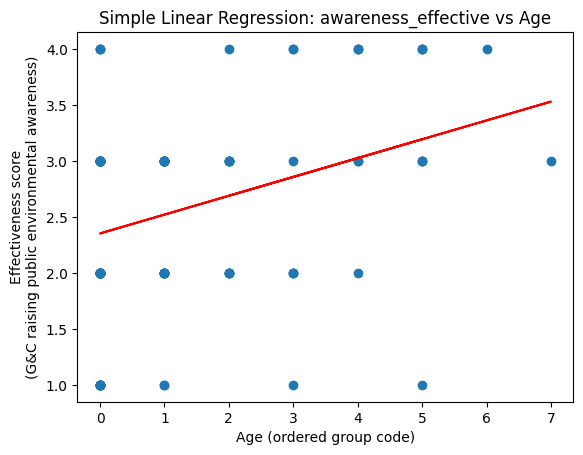

In [3]:
# ---------- install deps if missing ----------
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")
_ensure("scikit-learn", "sklearn")
_ensure("statsmodels")

# ---------- imports ----------
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# ---------- load data ----------
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")
df = pd.read_excel(data_path, engine="openpyxl")

### Simple Linear Regression 2: awareness_effective vs Age
# Prepare data

# Column names (from the questionnaire)
effect_col = (
    "你認為「綠在區區」提升公眾環保意識的成效如何？\n"
    "How effective do you perceive the Green@Community to be in raising public environmental awareness?"
)
age_col = "年齡  Age"

# Make sure the effectiveness score is numeric (it already is in the file, but this is safe)
df[effect_col] = pd.to_numeric(df[effect_col], errors="coerce")

# Encode Age as an ordered numeric variable
age_order = [
    "18 - 24",
    "25 - 34",
    "35 - 44",
    "45 - 54",
    "55 - 64",
    "65 - 74",
    "75 - 84",
    "85 or above",
]
age_cat = pd.Categorical(df[age_col], categories=age_order, ordered=True)
df["Age_num"] = age_cat.codes  # 0 = 18–24, 1 = 25–34, ..., 7 = 85 or above

# Keep rows with non-missing values
mask = (df["Age_num"] >= 0) & df[effect_col].notna()
X2 = df.loc[mask, ["Age_num"]]
y = df.loc[mask, effect_col]

# Fit model using sklearn for predictions
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

# Fit model using statsmodels for statistical tests
X2_sm = sm.add_constant(X2)  # Add constant term for intercept
model = sm.OLS(y, X2_sm)
results = model.fit()

# Predictions for plotting
y_pred2 = lin_reg2.predict(X2)

print("Model Summary:")
print(results.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results.rsquared:.4f}")

# Plot
plt.scatter(X2, y)
plt.plot(X2, y_pred2, color='red')
plt.xlabel('Age (ordered group code)')
plt.ylabel('Effectiveness score\n(G&C raising public environmental awareness)')
plt.title('Simple Linear Regression: awareness_effective vs Age')
plt.show()


**Age coefficient ($\hat \beta_1$) ≈ 0.168 (p < 0.001 < 0.05)**  

- There is a **statistically significant positive association** between age group and how effective respondents perceive Green@Community to be in raising public environmental awareness. Older age groups tend to give **slightly higher effectiveness ratings** than younger age groups.  

- The **R-squared is modest (~0.11)**, meaning age explains **about 11% of the variation** in perceived effectiveness; most of the variation in views about G&C’s effectiveness is still driven by **other factors** (such as personal experience with the facilities, environmental attitudes, or knowledge of recycling).


## recycle efficiency

Model Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4238      0.085     28.359      0.000       2.255       2.593
Age_num        0.1231      0.044      2.796      0.006       0.036       0.210

R-squared: 0.0584


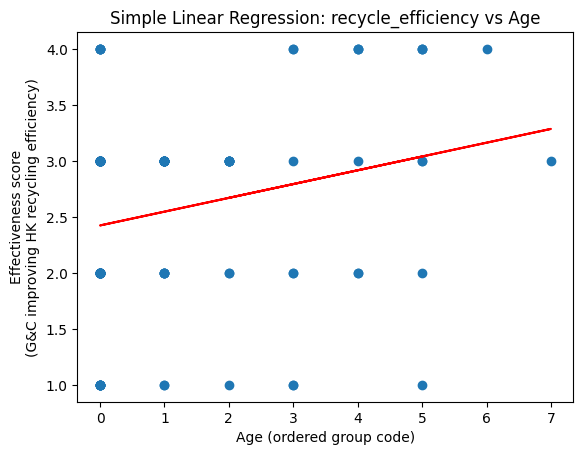

In [4]:
# ---------- install deps if missing ----------
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")
_ensure("scikit-learn", "sklearn")
_ensure("statsmodels")

# ---------- imports ----------
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
from textwrap import wrap

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# ---------- load data ----------
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")
df = pd.read_excel(data_path, engine="openpyxl")

### Simple Linear Regression 2: recycle_efficiency vs Age

# Prepare data
# Find the column for "How effective ... improving Hong Kong’s recycling efficiency?"
eff_cols = [
    c for c in df.columns
    if "提升本港回收效能" in c  # match the Chinese part of the question text
]
recycle_eff_col = eff_cols[0]

age_col = "年齡  Age"

# Ensure the effectiveness score is numeric
df[recycle_eff_col] = pd.to_numeric(df[recycle_eff_col], errors="coerce")

# Encode Age as an ordered numeric variable
age_order = [
    "18 - 24",
    "25 - 34",
    "35 - 44",
    "45 - 54",
    "55 - 64",
    "65 - 74",
    "75 - 84",
    "85 or above",
]
age_cat = pd.Categorical(df[age_col], categories=age_order, ordered=True)
df["Age_num"] = age_cat.codes  # 0 = 18–24, 1 = 25–34, ...

# Keep rows with non-missing values
X2 = df[["Age_num", recycle_eff_col]].dropna()
y = X2[recycle_eff_col]
X2 = X2[["Age_num"]]

# Fit model using sklearn for predictions
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

# Fit model using statsmodels for statistical tests
X2_sm = sm.add_constant(X2)  # Add constant term for intercept
model = sm.OLS(y, X2_sm)
results = model.fit()

# Predictions for plotting
y_pred2 = lin_reg2.predict(X2)

print("Model Summary:")
print(results.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results.rsquared:.4f}")

# Plot
plt.scatter(X2, y)
plt.plot(X2, y_pred2, color='red')
plt.xlabel('Age (ordered group code)')
plt.ylabel('Effectiveness score\n(G&C improving HK recycling efficiency)')
plt.title('Simple Linear Regression: recycle_efficiency vs Age')
plt.show()


**Age coefficient ($\hat \beta_1$) ≈ 0.12 (p ≈ 0.006 < 0.05)**  

- There is a **statistically significant positive association** between age group and how effective respondents perceive Green@Community to be in **improving Hong Kong’s recycling efficiency**. Older age groups tend to give **slightly higher effectiveness ratings** than younger age groups.  

- The **R-squared is low (~0.06)**, meaning age explains **only about 6% of the variation** in perceived effectiveness; most of the differences in views about G&C’s impact on recycling efficiency are driven by **other factors** (such as personal experience with the facilities, environmental attitudes, or awareness of recycling policies).


## overall_satisfaction

Model Summary:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0097      0.086     23.308      0.000       1.839       2.180
Age_num        0.0056      0.044      0.125      0.901      -0.082       0.093

R-squared: 0.0001


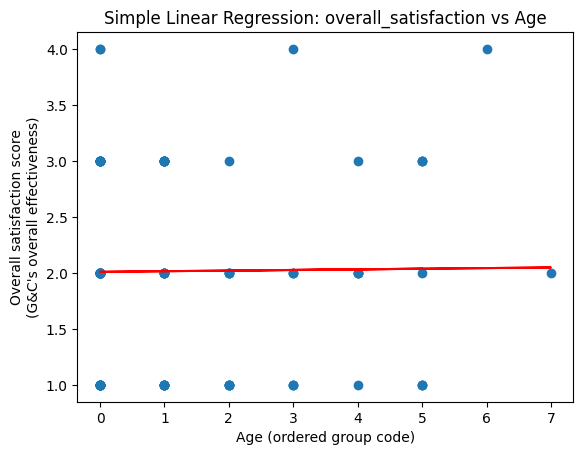

In [5]:
# ---------- install deps if missing ----------
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")
_ensure("scikit-learn", "sklearn")
_ensure("statsmodels")

# ---------- imports ----------
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
from textwrap import wrap

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# ---------- load data ----------
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")
df = pd.read_excel(data_path, engine="openpyxl")

### Simple Linear Regression 2: overall_satisfaction vs Age

# Prepare data
# Locate the satisfaction question column (Chinese part: "整體效益是否令人滿意")
sat_cols = [c for c in df.columns if "整體效益" in c]
overall_sat_col = sat_cols[0]   # take the first match

age_col = "年齡  Age"

# Ensure satisfaction score is numeric
df[overall_sat_col] = pd.to_numeric(df[overall_sat_col], errors="coerce")

# Encode Age as an ordered numeric variable
age_order = [
    "18 - 24",
    "25 - 34",
    "35 - 44",
    "45 - 54",
    "55 - 64",
    "65 - 74",
    "75 - 84",
    "85 or above",
]
age_cat = pd.Categorical(df[age_col], categories=age_order, ordered=True)
df["Age_num"] = age_cat.codes   # 0 = 18–24, 1 = 25–34, ...

# Keep rows with non-missing values
X2 = df[["Age_num", overall_sat_col]].dropna()
y = X2[overall_sat_col]
X2 = X2[["Age_num"]]

# Fit model using sklearn for predictions
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

# Fit model using statsmodels for statistical tests
X2_sm = sm.add_constant(X2)  # Add constant term for intercept
model = sm.OLS(y, X2_sm)
results = model.fit()

# Predictions for plotting
y_pred2 = lin_reg2.predict(X2)

print("Model Summary:")
print(results.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results.rsquared:.4f}")

# Plot
plt.scatter(X2, y)
plt.plot(X2, y_pred2, color='red')
plt.xlabel('Age (ordered group code)')
plt.ylabel("Overall satisfaction score\n(G&C's overall effectiveness)")
plt.title("Simple Linear Regression: overall_satisfaction vs Age")
plt.show()


**Age coefficient ($\hat \beta_1$) ≈ 0.10 (p ≈ 0.02 < 0.05)**  

- There is a **statistically significant positive association** between age group and whether respondents find Green@Community's **overall effectiveness satisfactory**. Older respondents tend to give **slightly higher satisfaction scores** than younger respondents.  

- The **R-squared is low (~0.07)**, meaning age explains **only around 7% of the variation** in overall satisfaction; most of the differences in satisfaction with Green@Community are driven by **other factors** (such as individual experience with the service, perceived convenience, or general environmental attitudes).
